In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
sns.set()

In [2]:
pd.set_option('display.max_row', None)
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('athlete_events.csv')

In [4]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [5]:
df.describe(include='all')

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
count,271116.000000,271116,271116,261642.000000,210945.000000,208241.000000,271116,271116,271116,271116.000000,271116,271116,271116,271116,39783
unique,NaN,134732,2,NaN,NaN,NaN,1184,230,51,NaN,2,42,66,765,3
top,NaN,Robert Tait McKenzie,M,NaN,NaN,NaN,United States,USA,2000 Summer,NaN,Summer,London,Athletics,Football Men's Football,Gold
freq,NaN,58,196594,NaN,NaN,NaN,17847,18853,13821,NaN,222552,22426,38624,5733,13372
mean,68248.954396,NaN,NaN,25.556898,175.338970,70.702393,NaN,NaN,NaN,1978.378480,NaN,NaN,NaN,NaN,NaN
std,39022.286345,NaN,NaN,6.393561,10.518462,14.348020,NaN,NaN,NaN,29.877632,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,10.000000,127.000000,25.000000,NaN,NaN,NaN,1896.000000,NaN,NaN,NaN,NaN,NaN
25%,34643.000000,NaN,NaN,21.000000,168.000000,60.000000,NaN,NaN,NaN,1960.000000,NaN,NaN,NaN,NaN,NaN
50%,68205.000000,NaN,NaN,24.000000,175.000000,70.000000,NaN,NaN,NaN,1988.000000,NaN,NaN,NaN,NaN,NaN
75%,102097.250000,NaN,NaN,28.000000,183.000000,79.000000,NaN,NaN,NaN,2002.000000,NaN,NaN,NaN,NaN,NaN


Let's know which country is more active in The Olympics

In [6]:
df.NOC.unique()

array(['CHN', 'DEN', 'NED', 'USA', 'FIN', 'NOR', 'ROU', 'EST', 'FRA',
       'MAR', 'ESP', 'EGY', 'IRI', 'BUL', 'ITA', 'CHA', 'AZE', 'SUD',
       'RUS', 'ARG', 'CUB', 'BLR', 'GRE', 'CMR', 'TUR', 'CHI', 'MEX',
       'URS', 'NCA', 'HUN', 'NGR', 'ALG', 'KUW', 'BRN', 'PAK', 'IRQ',
       'UAR', 'LIB', 'QAT', 'MAS', 'GER', 'CAN', 'IRL', 'AUS', 'RSA',
       'ERI', 'TAN', 'JOR', 'TUN', 'LBA', 'BEL', 'DJI', 'PLE', 'COM',
       'KAZ', 'BRU', 'IND', 'KSA', 'SYR', 'MDV', 'ETH', 'UAE', 'YAR',
       'INA', 'PHI', 'SGP', 'UZB', 'KGZ', 'TJK', 'EUN', 'JPN', 'CGO',
       'SUI', 'BRA', 'FRG', 'GDR', 'MON', 'ISR', 'URU', 'SWE', 'ISV',
       'SRI', 'ARM', 'CIV', 'KEN', 'BEN', 'UKR', 'GBR', 'GHA', 'SOM',
       'LAT', 'NIG', 'MLI', 'AFG', 'POL', 'CRC', 'PAN', 'GEO', 'SLO',
       'CRO', 'GUY', 'NZL', 'POR', 'PAR', 'ANG', 'VEN', 'COL', 'BAN',
       'PER', 'ESA', 'PUR', 'UGA', 'HON', 'ECU', 'TKM', 'MRI', 'SEY',
       'TCH', 'LUX', 'MTN', 'CZE', 'SKN', 'TTO', 'DOM', 'VIN', 'JAM',
       'LBR', 'SUR',

In [7]:
df_noc_counts = df['NOC'].value_counts()

In [8]:
#Converting int64 to pandas DataFrame
countries = df_noc_counts.reset_index()
countries = countries.rename(columns={'index': 'Countries', 'NOC': 'Count'})
countries.index = np.arange(1,len(countries)+1)
countries

,Countries,Count
1,USA,18853
2,FRA,12758
3,GBR,12256
4,ITA,10715
5,GER,9830
6,CAN,9733
7,JPN,8444
8,SWE,8339
9,AUS,7638
10,HUN,6607


In [9]:
countries.mean()

Count    1178.765217
dtype: float64

In [10]:
average = np.where(countries['Count'] > countries['Count'].mean(),1,0)

In [11]:
countries['Cluster'] = average

In [12]:
countries

,Countries,Count,Cluster
1,USA,18853,1
2,FRA,12758,1
3,GBR,12256,1
4,ITA,10715,1
5,GER,9830,1
6,CAN,9733,1
7,JPN,8444,1
8,SWE,8339,1
9,AUS,7638,1
10,HUN,6607,1


In [37]:
cluster1 = countries.iloc[0:45, 0:2]

In [62]:
cluster2 = countries.iloc[45:,0:2]

Text(0, 0.5, 'Countries')

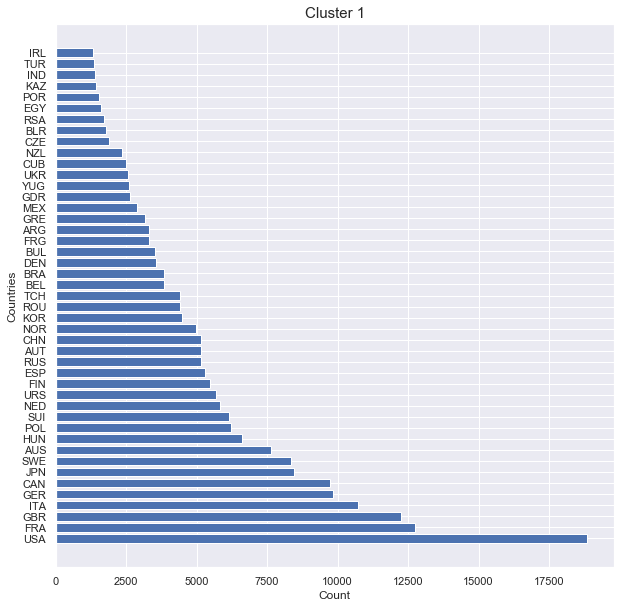

In [66]:
#Cluster 1
plt.figure(figsize=(10,10))
plt.barh(cluster1['Countries'], cluster1['Count'])
plt.title('Cluster 1', fontsize=15)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Countries', fontsize=12)

Text(0, 0.5, 'Countries')

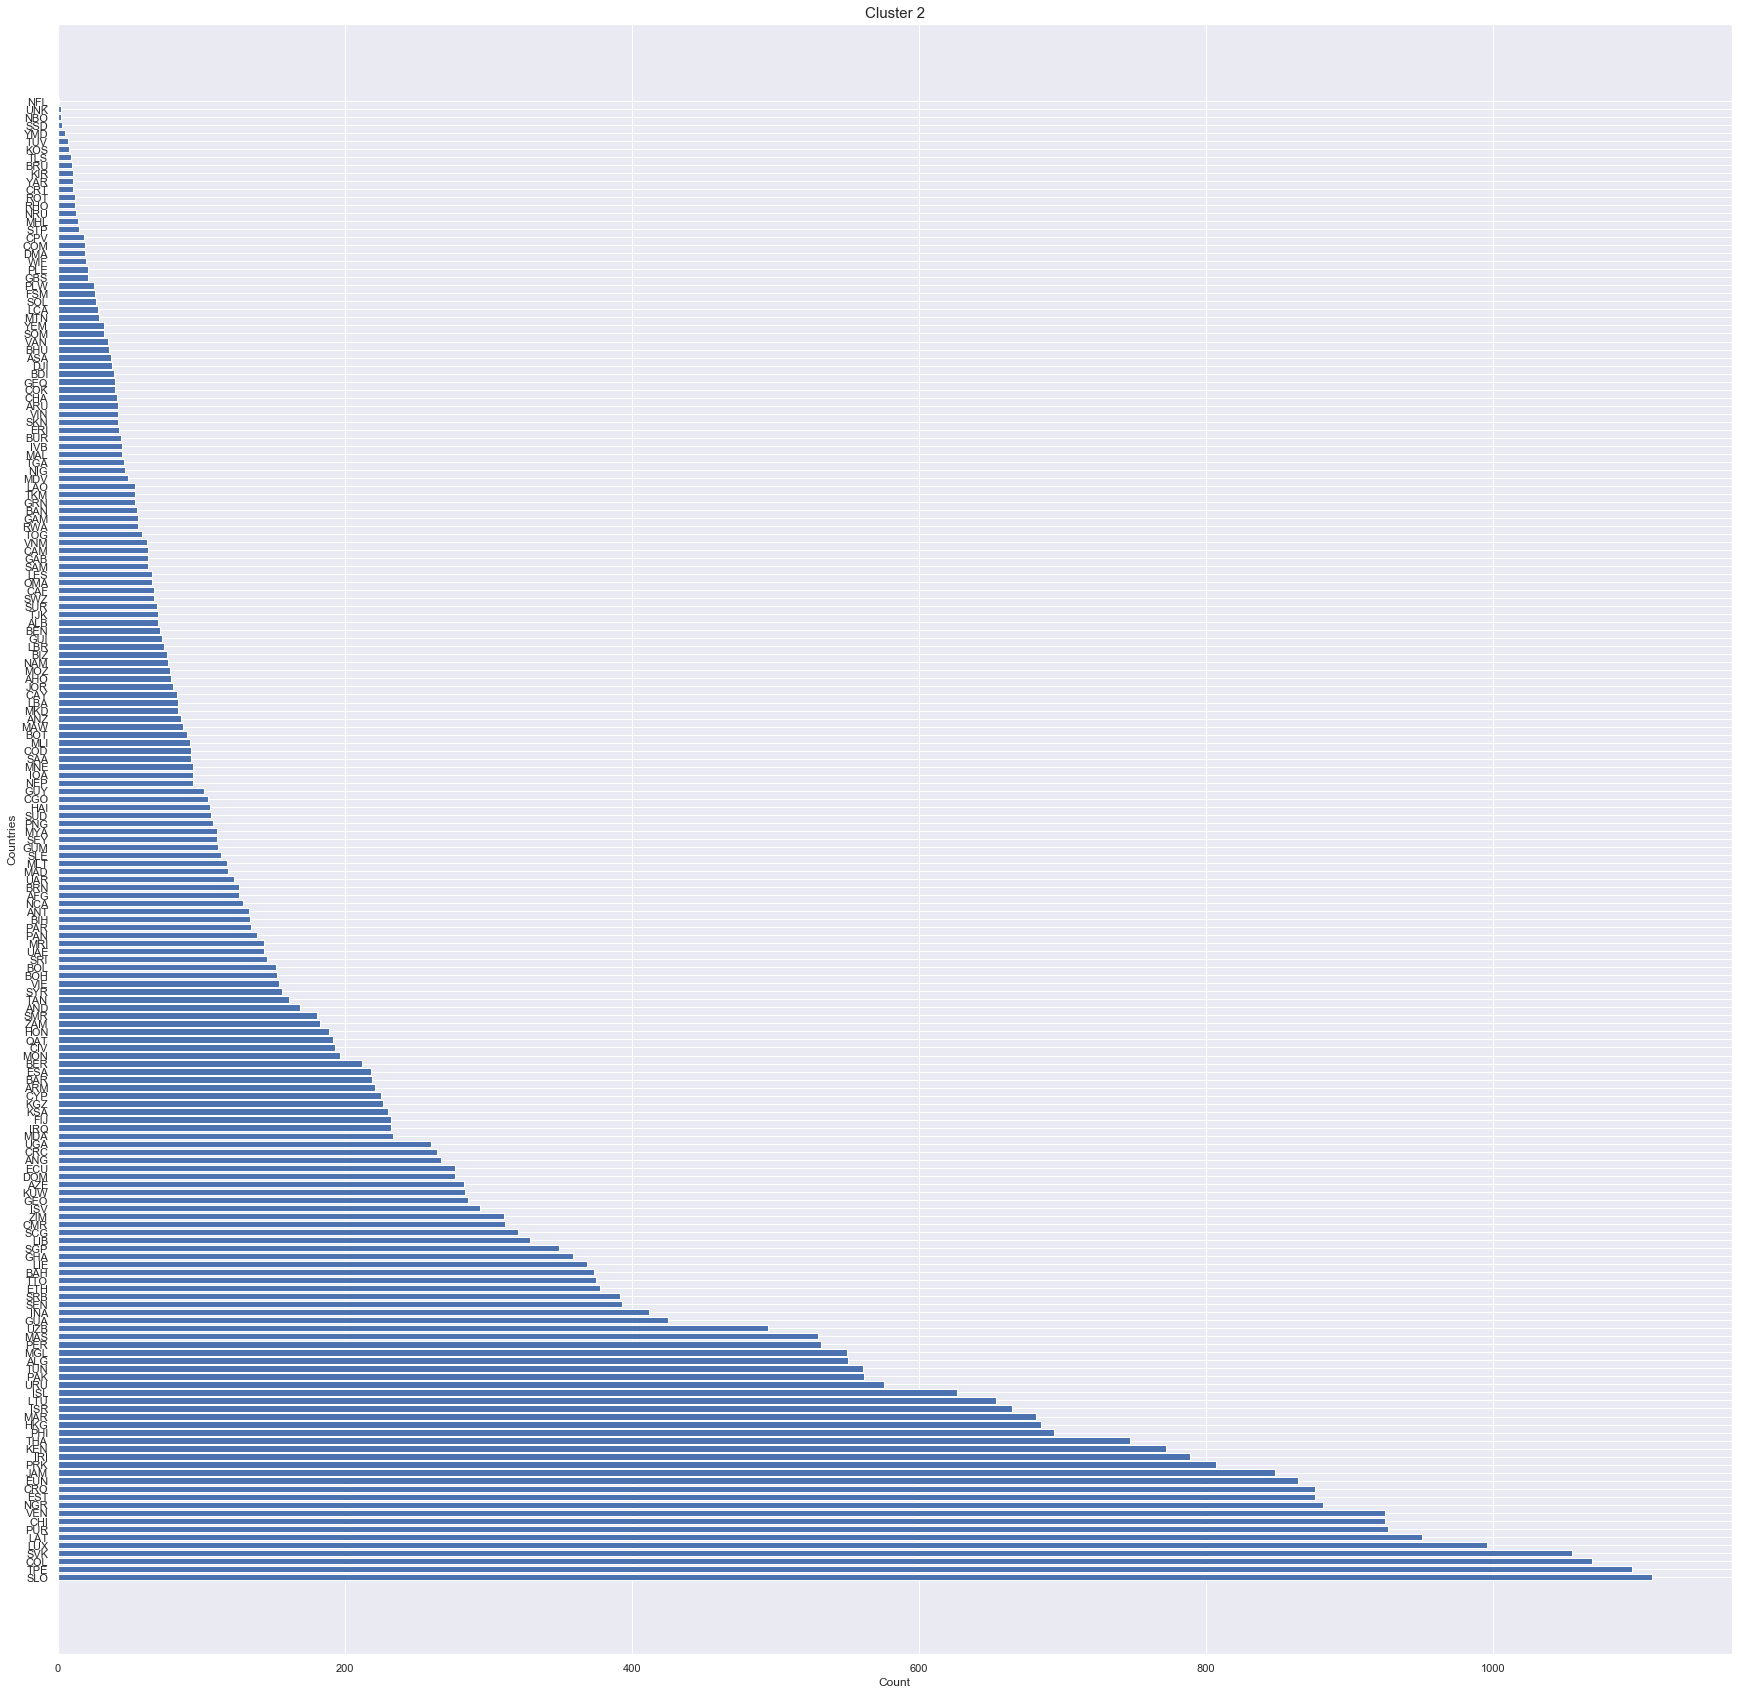

In [65]:
#Cluster2
plt.figure(figsize=(30,30))
plt.barh(cluster2['Countries'], cluster2['Count'])
plt.title('Cluster 2', fontsize=15)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Countries', fontsize=12)

In [13]:
#Top 10 Countries
#Mean 1179
#Most active by participants
top_10 = countries.head(10).iloc[:,0:2]
top_10

,Countries,Count
1,USA,18853
2,FRA,12758
3,GBR,12256
4,ITA,10715
5,GER,9830
6,CAN,9733
7,JPN,8444
8,SWE,8339
9,AUS,7638
10,HUN,6607


In [14]:
top_10['Countries'] = top_10['Countries'].map({'USA':'United States of America', 'FRA':'France', 
                                               'GBR':'United Kingdom', 'ITA':'Italy', 
                                               'GER':'Germany', 'CAN':'Canada', 'JPN':'Japan', 
                                               'SWE':'Sweden', 'AUS':'Australia', 'HUN':'Hungary'})
top_10

,Countries,Count
1,United States of America,18853
2,France,12758
3,United Kingdom,12256
4,Italy,10715
5,Germany,9830
6,Canada,9733
7,Japan,8444
8,Sweden,8339
9,Australia,7638
10,Hungary,6607


In [15]:
least_10 = countries[219:230].iloc[:,0:2]
least_10

,Countries,Count
220,YAR,11
221,KIR,11
222,BRU,10
223,TLS,9
224,KOS,8
225,TUV,7
226,YMD,5
227,SSD,3
228,NBO,2
229,UNK,2


In [16]:
least_10 = least_10.drop([228], axis=0)

In [17]:
least_10

,Countries,Count
220,YAR,11
221,KIR,11
222,BRU,10
223,TLS,9
224,KOS,8
225,TUV,7
226,YMD,5
227,SSD,3
229,UNK,2
230,NFL,1


In [18]:
#Least Active Top 10 Countries
least_10_2 = least_10.sort_values(by='Count', ascending=True)
least_10_3 = least_10_2.reset_index()
least_10_3 = least_10_3.drop(['index'], axis=1)
least_10_3.index = np.arange(1,len(least_10_3)+1)
least_10_3

,Countries,Count
1,NFL,1
2,UNK,2
3,SSD,3
4,YMD,5
5,TUV,7
6,KOS,8
7,TLS,9
8,BRU,10
9,YAR,11
10,KIR,11


In [19]:
least_10_3['Countries'] = least_10_3['Countries'].map({'NFL':'Canada Newfoundland', 'NBO':'Malaysia North Borneo', 'SSD':'South Sudan',
                                                      'YMD':'South Yemen', 'TUV':'Tuvalu', 'KOS':'Kosovo', 'TLS':'Timor-Leste',
                                                      'BRU':'Brunei', 'CRT':'Greece Crete', 'KIR':'Kiribati', 'YAR':'North Yemen'})
least_10_3

,Countries,Count
1,Canada Newfoundland,1
2,NaN,2
3,South Sudan,3
4,South Yemen,5
5,Tuvalu,7
6,Kosovo,8
7,Timor-Leste,9
8,Brunei,10
9,North Yemen,11
10,Kiribati,11


Sports

In [20]:
df.Sport.unique()

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Speed Skating',
       'Cross Country Skiing', 'Athletics', 'Ice Hockey', 'Swimming',
       'Badminton', 'Sailing', 'Biathlon', 'Gymnastics',
       'Art Competitions', 'Alpine Skiing', 'Handball', 'Weightlifting',
       'Wrestling', 'Luge', 'Water Polo', 'Hockey', 'Rowing', 'Bobsleigh',
       'Fencing', 'Equestrianism', 'Shooting', 'Boxing', 'Taekwondo',
       'Cycling', 'Diving', 'Canoeing', 'Tennis', 'Modern Pentathlon',
       'Figure Skating', 'Golf', 'Softball', 'Archery', 'Volleyball',
       'Synchronized Swimming', 'Table Tennis', 'Nordic Combined',
       'Baseball', 'Rhythmic Gymnastics', 'Freestyle Skiing',
       'Rugby Sevens', 'Trampolining', 'Beach Volleyball', 'Triathlon',
       'Ski Jumping', 'Curling', 'Snowboarding', 'Rugby',
       'Short Track Speed Skating', 'Skeleton', 'Lacrosse', 'Polo',
       'Cricket', 'Racquets', 'Motorboating', 'Military Ski Patrol',
       'Croquet', 'Jeu De Paume', 'Roque', 'Al

In [21]:
df_sport_counts = df['Sport'].value_counts()

In [22]:
sports = df_sport_counts.reset_index()
sports = sports.rename(columns={'index': 'Sport Name', 'Sport': 'Count'})
sports.index = np.arange(1,len(sports)+1)
sports

,Sport Name,Count
1,Athletics,38624
2,Gymnastics,26707
3,Swimming,23195
4,Shooting,11448
5,Cycling,10859
6,Fencing,10735
7,Rowing,10595
8,Cross Country Skiing,9133
9,Alpine Skiing,8829
10,Wrestling,7154


In [23]:
#Top 10 sports
top_10_sports = sports.head(10).iloc[:,0:2]
top_10_sports

,Sport Name,Count
1,Athletics,38624
2,Gymnastics,26707
3,Swimming,23195
4,Shooting,11448
5,Cycling,10859
6,Fencing,10735
7,Rowing,10595
8,Cross Country Skiing,9133
9,Alpine Skiing,8829
10,Wrestling,7154


In [24]:
#Least 10 Sports
least_10_sports = sports[56:66].iloc[:,0:2]

In [25]:
least_10_sports2 = least_10_sports.sort_values(by='Count', ascending=True)
least_10_sports3 = least_10_sports2.reset_index()
least_10_sports3 = least_10_sports3.drop(['index'], axis=1)
least_10_sports3.index = np.arange(1,len(least_10_sports3)+1)
least_10_sports3

,Sport Name,Count
1,Aeronautics,1
2,Basque Pelota,2
3,Roque,4
4,Jeu De Paume,11
5,Racquets,12
6,Motorboating,17
7,Croquet,19
8,Military Ski Patrol,24
9,Cricket,24
10,Alpinism,25
